In [ ]:
#Query the databse

In [21]:
import psycopg2

# Establish a connection to the database by creating a cursor object
# The PostgreSQL server must be accessed through the PostgreSQL APP or Terminal Shell

# conn = psycopg2.connect("dbname=suppliers port=5432 user=postgres password=postgres")

# Or:
conn = psycopg2.connect(host="ec2-52-63-12-173.ap-southeast-2.compute.amazonaws.com", port = 5432, database="misc", user="hiring_test_readonly", password="pretense_yarrow_armhole")

# Create a cursor object
cur = conn.cursor()

# Some exploratories queries
#cur.execute("SELECT table_name FROM information_schema.tables")
#cur.execute("SELECT * FROM information_schema.tables")
#cur.execute("SELECT * FROM information_schema.tables WHERE table_schema = 'information_schema'")
#cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public' ORDER BY table_name")
##The information_schema.columns catalog contains the information on columns of all tables.To get information on columns of a table, you query the information_schema.columns catalog. For example:
#cur.execute("SELECT table_name, column_name, data_type FROM information_schema.columns WHERE table_name = 'afr_articles'")
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name = 'afr_articles'")
query_results = cur.fetchall()
print(query_results)

[('publish_datetime',), ('sentiment_score',), ('date_time_utc',), ('date_time_aest',), ('article_content',), ('tags',), ('sector',), ('category',), ('sub_category',), ('author',), ('article_title',), ('article_summary',)]


In [22]:
len(query_results)

12

In [23]:
# A function that takes in a PostgreSQL query and outputs a pandas database 
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

In [24]:
import pandas as pd

#Final query
table = create_pandas_table("SELECT publish_datetime, date_time_utc, date_time_aest, sentiment_score, tags, sector, category, author, article_title, article_summary, sub_category, article_content FROM afr_articles ORDER BY publish_datetime")

In [7]:
#Just in case the database is down
import pandas

table = pandas.read_csv('table.csv')
del table['Unnamed: 0']

In [ ]:
#Exploratory Data Analysis and some basic feature engineering techniques

In [8]:
table

,publish_datetime,date_time_utc,date_time_aest,sentiment_score,tags,sector,category,author,article_title,article_summary,sub_category,article_content
0,2018-12-01 05:19:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,-0.512,Copper,Companies,Mining,Zandi Shabalala,Copper steady as all eyes turn to G20 meeting ...,NaN,Copper,London | Copper prices steadied on Friday ahea...
1,2018-12-01 05:28:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.490,Oil,Companies,Energy,"Jessica Resnick-Ault, Scott DiSavino",US September oil output hits 11.5m barrels per...,NaN,Oil,New York | US crude oil output hit a new all-t...
2,2018-12-01 08:36:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.171,NaN,Markets,Equity Markets,"Vildana Hajric, Brendan Walsh","US stocks, bonds rise ahead of trade talks",NaN,NaN,New York | US stocks gained as investors turne...
3,2018-12-02 13:18:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,-0.234,"Iron ore, BHP Billiton, Fortescue Metals Group...",Companies,Mining,Timothy Moore,Iron ore sell-off reflects weaker overall econ...,NaN,Iron ore,The price of iron ore has tumbled nearly 15 pe...
4,2018-12-02 14:42:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.274,NaN,Markets,-,William McInnes,Consumer spending the key for economists in GD...,NaN,NaN,Economists are awaiting indications wage growt...
...,...,...,...,...,...,...,...,...,...,...,...,...
21756,2021-02-21 09:00:00+00:00,2021-02-20 22:23:00,2021-02-21 09:23:00+00:00,0.142,"Australian Open, Naomi Osaka",Companies,Sport,-,Naomi Osaka stays perfect in Slam finals,NaN,Australian Open,As Naomi Osaka strode through the Champion’s W...
21757,2021-02-21 11:56:00+00:00,2021-02-21 01:04:00,2021-02-21 12:04:00+00:00,0.047,"Regulation, Sanjeev Gupta, David Cameron, UK, ...",Companies,Financial Services,"Robert Smith, Arash Massoudi, Olaf Storbeck",Regulator urges Greensill Bank to reduce expos...,NaN,Regulation,"London/Frankfurt | Greensill Capital, a SoftBa..."
21758,2021-02-21 12:07:00+00:00,2021-02-21 01:23:00,2021-02-21 12:23:00+00:00,-0.064,"Media bargaining code, Media & marketing, Face...",Companies,Media And Marketing,-,The war between nation states and big tech is ...,NaN,Media bargaining code,What price to be a fly on the wall when Prime ...
21759,2021-02-21 12:07:00+00:00,2021-02-21 02:04:00,2021-02-21 13:04:00+00:00,-0.062,"Media bargaining code, Media & marketing, Face...",Companies,Media And Marketing,Grant Wilson,The war between nation states and big tech is ...,NaN,Media bargaining code,What price to be a fly on the wall when Prime ...


In [25]:
table['tags'].value_counts()

                                                                                                       878
Before the Bell, World markets, Shares, Currencies, Commodities, Bonds                                 510
Special Reports                                                                                        129
Sharemarket, Shares, Market Wrap                                                                       122
Shares, Investing                                                                                      108
                                                                                                      ... 
Online shopping, EU                                                                                      1
Trade wars, China, Steven Mnuchin, Donald Trump                                                          1
Monetary policy, Harvey Norman, Gerry Harvey, Costa Group, Corporate Travel Management Limited, RBA      1
Coronavirus pandemic, Treasury Wine E

In [26]:
table['sector'].value_counts()

Companies    17016
Markets       4745
Name: sector, dtype: int64

In [27]:
table['category'].value_counts()

Financial Services    4903
Equity Markets        3429
Energy                1881
Retail                1544
Mining                1468
                      ... 
Food & drink             1
Sales                    1
Cyber security           1
Trucking                 1
Appliances               1
Name: category, Length: 62, dtype: int64

In [28]:
table['author'].value_counts()

Angela Macdonald-Smith              1011
Simon Evans                          907
Sue Mitchell                         822
Max Mason                            733
Timothy Moore                        702
                                    ... 
John Geddie                            1
Sridhar Natarajan, Viren Vaghela       1
Joel Fitzgibbon                        1
MCT                                    1
Jonathan Shapiro, James Frost          1
Name: author, Length: 3018, dtype: int64

In [29]:
table['sub_category'].value_counts()

                        4068
Coronavirus pandemic    1226
Sharemarket              681
Before the Bell          586
Investing                436
                        ... 
Music awards               1
Leveraged investing        1
USA                        1
Afterpay Holdings          1
NFL 2020                   1
Name: sub_category, Length: 734, dtype: int64

In [30]:
table['sentiment_score'].min()

-0.898

In [31]:
table['sentiment_score'].max()

0.88

In [32]:
table['sentiment_score'].describe()

count    21761.000000
mean         0.021142
std          0.259305
min         -0.898000
25%         -0.162000
50%          0.024000
75%          0.207000
max          0.880000
Name: sentiment_score, dtype: float64

In [33]:
table['sentiment_score']

0       -0.512
1        0.490
2        0.171
3       -0.234
4        0.274
         ...  
21756    0.142
21757    0.047
21758   -0.064
21759   -0.062
21760   -0.298
Name: sentiment_score, Length: 21761, dtype: float64

In [ ]:
#Profiling the raw dataframe from the database, it is available in output2.html

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(vendor_info)
prof.to_file(output_file='output2.html')

In [34]:
import datetime

#this line converts the string object in Timestamp object
#table['publish_date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M") for d in vendor_info["publish_datetime"]]

# extracting date from timestamp
table['publish_date'] = [datetime.datetime.date(d) for d in table['publish_datetime']] 
table['date_utc'] = [datetime.datetime.date(d) for d in table['date_time_utc']] 
table['date_aest'] = [datetime.datetime.date(d) for d in table['date_time_aest']]

In [35]:
table

,publish_datetime,date_time_utc,date_time_aest,sentiment_score,tags,sector,category,author,article_title,article_summary,sub_category,article_content,publish_date,date_utc,date_aest
0,2018-12-01 05:19:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,-0.512,Copper,Companies,Mining,Zandi Shabalala,Copper steady as all eyes turn to G20 meeting ...,,Copper,London | Copper prices steadied on Friday ahea...,2018-12-01,2020-12-16,2020-12-17
1,2018-12-01 05:28:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.490,Oil,Companies,Energy,"Jessica Resnick-Ault, Scott DiSavino",US September oil output hits 11.5m barrels per...,,Oil,New York | US crude oil output hit a new all-t...,2018-12-01,2020-12-16,2020-12-17
2,2018-12-01 08:36:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.171,,Markets,Equity Markets,"Vildana Hajric, Brendan Walsh","US stocks, bonds rise ahead of trade talks",,,New York | US stocks gained as investors turne...,2018-12-01,2020-12-16,2020-12-17
3,2018-12-02 13:18:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,-0.234,"Iron ore, BHP Billiton, Fortescue Metals Group...",Companies,Mining,Timothy Moore,Iron ore sell-off reflects weaker overall econ...,,Iron ore,The price of iron ore has tumbled nearly 15 pe...,2018-12-02,2020-12-16,2020-12-17
4,2018-12-02 14:42:00+00:00,2020-12-16 17:38:00,2020-12-17 04:38:00+00:00,0.274,,Markets,-,William McInnes,Consumer spending the key for economists in GD...,,,Economists are awaiting indications wage growt...,2018-12-02,2020-12-16,2020-12-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,2021-02-21 09:00:00+00:00,2021-02-20 22:23:00,2021-02-21 09:23:00+00:00,0.142,"Australian Open, Naomi Osaka",Companies,Sport,-,Naomi Osaka stays perfect in Slam finals,,Australian Open,As Naomi Osaka strode through the Champion’s W...,2021-02-21,2021-02-20,2021-02-21
21757,2021-02-21 11:56:00+00:00,2021-02-21 01:04:00,2021-02-21 12:04:00+00:00,0.047,"Regulation, Sanjeev Gupta, David Cameron, UK, ...",Companies,Financial Services,"Robert Smith, Arash Massoudi, Olaf Storbeck",Regulator urges Greensill Bank to reduce expos...,,Regulation,"London/Frankfurt | Greensill Capital, a SoftBa...",2021-02-21,2021-02-21,2021-02-21
21758,2021-02-21 12:07:00+00:00,2021-02-21 01:23:00,2021-02-21 12:23:00+00:00,-0.064,"Media bargaining code, Media & marketing, Face...",Companies,Media And Marketing,-,The war between nation states and big tech is ...,,Media bargaining code,What price to be a fly on the wall when Prime ...,2021-02-21,2021-02-21,2021-02-21
21759,2021-02-21 12:07:00+00:00,2021-02-21 02:04:00,2021-02-21 13:04:00+00:00,-0.062,"Media bargaining code, Media & marketing, Face...",Companies,Media And Marketing,Grant Wilson,The war between nation states and big tech is ...,,Media bargaining code,What price to be a fly on the wall when Prime ...,2021-02-21,2021-02-21,2021-02-21


In [36]:
sentiment_by_day = table.pivot_table(index='publish_date', values='sentiment_score', aggfunc='mean')

In [37]:
sentiment_by_day

,sentiment_score
publish_date,
2018-12-01,0.049667
2018-12-02,0.013714
2018-12-03,-0.005323
2018-12-04,-0.035000
2018-12-05,-0.000556
...,...
2021-02-17,0.174121
2021-02-18,0.020328
2021-02-19,0.142808


In [ ]:
#Daily average Sentiment vs timestamp 

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
pyplot.plot(sentiment_by_day)
pyplot.show()

In [38]:
sentiment_by_day.isnull().sum().sum()

0

In [39]:
sentiment_by_day.isnull().sum()

sentiment_score    0
dtype: int64

In [40]:
sentiment_by_day_utc = table.pivot_table(index='date_utc', values='sentiment_score', aggfunc='mean')
sentiment_by_day_utc

,sentiment_score
date_utc,
2020-12-15,-0.082385
2020-12-16,0.021317
2020-12-17,0.018655
2020-12-18,0.017615
2020-12-19,0.018519
2020-12-20,-0.027000
2020-12-21,-0.086500
2020-12-22,0.020924
2020-12-23,0.000344


In [ ]:
#Daily average Sentiment vs timestamp utc

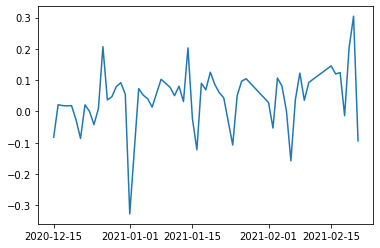

In [44]:
from pandas import read_csv
from matplotlib import pyplot
pyplot.plot(sentiment_by_day_utc)
pyplot.show()

In [42]:
sentiment_by_day_east = table.pivot_table(index='date_aest')
sentiment_by_day_east

,sentiment_score
date_aest,
2020-12-15,-0.082385
2020-12-16,0.039113
2020-12-17,0.012046
2020-12-18,0.015127
2020-12-19,0.019224
2020-12-20,-0.069833
2020-12-21,-0.046314
2020-12-22,0.018103
2020-12-23,0.023961


In [ ]:
#Daily average Sentiment vs timestamp east aus

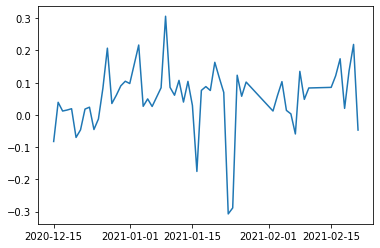

In [43]:
from pandas import read_csv
from matplotlib import pyplot
pyplot.plot(sentiment_by_day_east)
pyplot.show()

In [ ]:
#Summing up categories instances by timestamp 

In [45]:
sentiment_by_day_category = table.pivot_table(index='publish_date', columns='category', values='sentiment_score', fill_value=0, aggfunc='count')

In [46]:
sentiment_by_day_category

category,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,Construction,...,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics
publish_date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-02,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-03,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-04,3,0,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
2018-12-05,4,0,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,0,0,2,0,0,0,0,0,1,0,...,3,0,0,1,4,0,0,0,0,0
2021-02-18,0,0,0,0,0,0,0,0,1,0,...,4,0,0,0,0,0,0,0,0,0
2021-02-19,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Summing up categories instances by sector

In [47]:
sentiment_by_day_sector = table.pivot_table(index='publish_date', columns='sector', values='sentiment_score', fill_value=0, aggfunc='count')
sentiment_by_day_sector

sector,Companies,Markets
publish_date,,
2018-12-01,2,1
2018-12-02,17,4
2018-12-03,27,4
2018-12-04,26,4
2018-12-05,28,8
...,...,...
2021-02-17,55,11
2021-02-18,59,5
2021-02-19,22,4


In [ ]:
#Merge category and average daily sentiment

In [48]:
pre_merge=pd.merge(sentiment_by_day,sentiment_by_day_category, how='inner', left_index=True, right_index=True)
pre_merge

,sentiment_score,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,...,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics
publish_date,,,,,,,,,,,,,,,,,,,,,
2018-12-01,0.049667,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-02,0.013714,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-03,-0.005323,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-04,-0.035000,3,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
2018-12-05,-0.000556,4,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,0.174121,0,0,2,0,0,0,0,0,1,...,3,0,0,1,4,0,0,0,0,0
2021-02-18,0.020328,0,0,0,0,0,0,0,0,1,...,4,0,0,0,0,0,0,0,0,0
2021-02-19,0.142808,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Merge category, sector and average daily sentiment in one dataframe

In [191]:
merge=pd.merge(pre_merge,sentiment_by_day_sector, how='inner', left_index=True, right_index=True)
merge

,sentiment_score,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,Construction,Copper,Currencies,Cyber security,Debt Markets,Defence,Derivatives,Education,Electricity,Employment,Energy,Equity Markets,Financial Services,Food & drink,Games And Wagering,Gas,Gold,Health insurance,Healthcare And Fitness,Hedge funds,Infrastructure,Interest rates,Investment banking,Iron ore,Legal industry,Managed funds,Manufacturing,Media And Marketing,Mining,Oil,Pharmaceuticals,Portfolio management,Ports,Private equity,Professional Services,Rail,Retail,Roads,Sales,Shipping,Small business,Soft commodities,Special Reports,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics,Companies,Markets
publish_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-01,0.049667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
2018-12-02,0.013714,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0,0,0,0,0,2,0,1,0,0,1,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4
2018-12-03,-0.005323,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,27,4
2018-12-04,-0.035000,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,26,4
2018-12-05,-0.000556,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,5,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,0.174121,0,0,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,8,8,0,9,0,0,0,2,0,1,0,0,0,0,0,2,3,8,0,0,0,0,0,1,0,9,0,0,0,0,0,0,3,0,0,1,4,0,0,0,0,0,55,11
2021-02-18,0.020328,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,10,3,8,0,3,0,0,0,5,0,2,0,0,0,0,0,3,13,4,0,0,0,0,0,6,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,59,5
2021-02-19,0.142808,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,4


In [ ]:
#Profiling merge dataframe to explore possible relationships

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(merge)
prof.to_file(output_file='output3.html')

In [ ]:
#Stats about daily average sentiment score

In [192]:
merge['sentiment_score'].describe()

count    796.000000
mean       0.015922
std        0.093487
min       -0.506000
25%       -0.029038
50%        0.015073
75%        0.065891
max        0.529000
Name: sentiment_score, dtype: float64

In [ ]:
#Distribution variable response: daily average sentiment score

Text(0.5, 1.0, 'sentiment_score distribution')

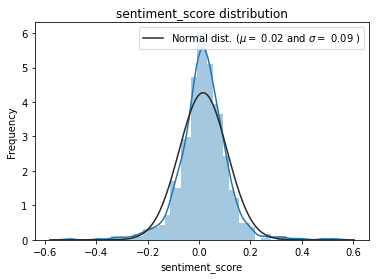

In [51]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(merge['sentiment_score'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(merge['sentiment_score'])

#Now plot the distribution
pyplot.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
pyplot.ylabel('Frequency')
pyplot.title('sentiment_score distribution')

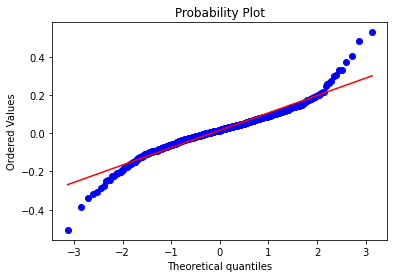

In [52]:
#normal probability plot
from scipy import stats

fig = pyplot.figure()
res = stats.probplot(merge['sentiment_score'], plot=pyplot)

In [ ]:
#Explore correlations

Find most important features relative to target
sentiment_score       1.000000
Energy                0.109829
Games And Wagering    0.100595
Companies             0.098928
Mining                0.091584
                        ...   
Accounting           -0.038574
Tourism              -0.043127
Trade                -0.047399
Food & drink         -0.047928
Apple                -0.052947
Name: sentiment_score, Length: 65, dtype: float64


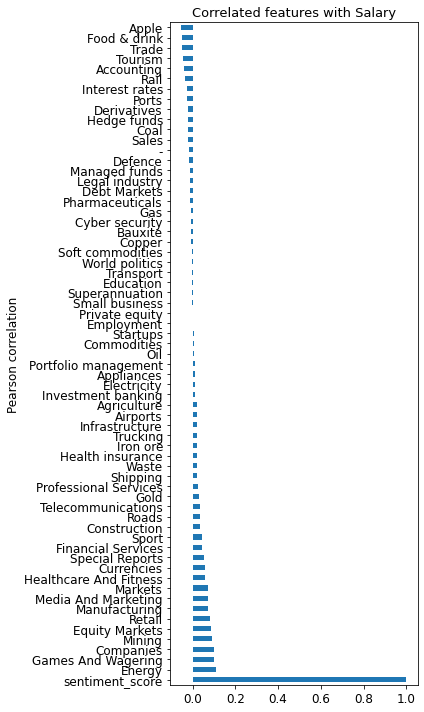

In [53]:
import numpy as np 
%matplotlib inline
pd.options.display.max_columns = None # show all columns
import missingno as msno 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings # ignore file warnings
warnings.filterwarnings('ignore')

print("Find most important features relative to target")
corr_overallqual=merge.corr()["sentiment_score"]
print (corr_overallqual[np.argsort(corr_overallqual, axis=0)[::-1]])

fig, ax = pyplot.subplots(figsize = (6, 10))
corr_overallqual[np.argsort(corr_overallqual, axis=0)[::-1]].plot(kind='barh')
pyplot.tick_params(labelsize=12)
pyplot.ylabel("Pearson correlation",size=12)
pyplot.title('Correlated features with Salary', size=13)
pyplot.tight_layout()

In [54]:
# Plotting function to plot each variable vs variable response (daily average sentiment score)

def explore_variables(target_name, dt):
    for col in dt.drop(target_name, 1).columns:
        if merge.dtypes[merge.columns.get_loc(col)] == 'O': # categorical variable
            f, ax = plt.subplots()
            fig = sns.boxplot(x=col, y=target_name, data=dt)
            ax = sns.swarmplot(x=col, y=target_name, data=dt, color=".25", alpha=0.4)
            fig.axis(ymin=0, ymax=50000)
        else: # numerical variable
            fig, ax = pyplot.subplots()
            ax.scatter(x=dt[col], y=dt[target_name])
            pyplot.ylabel(target_name, fontsize=13)
            pyplot.xlabel(col, fontsize=13)
            pyplot.show()

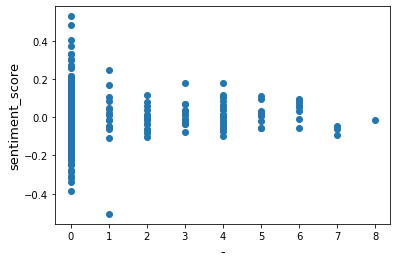

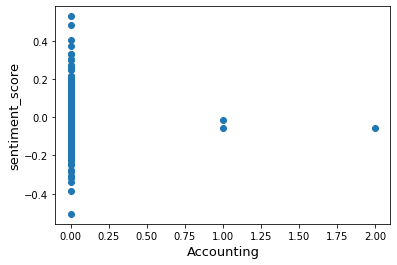

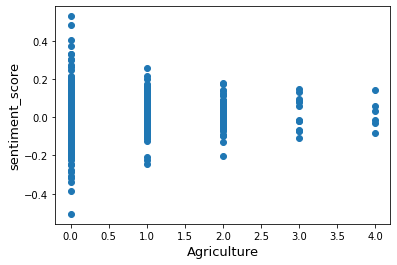

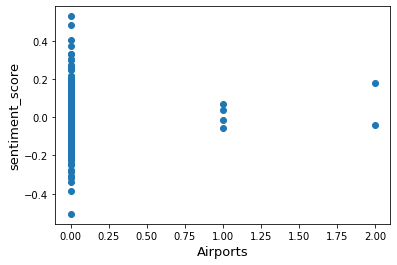

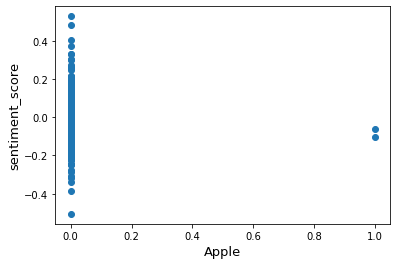

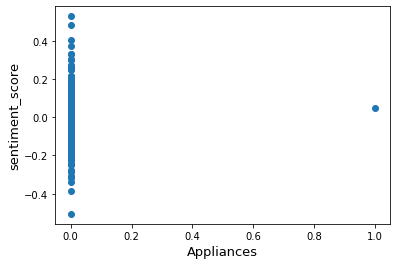

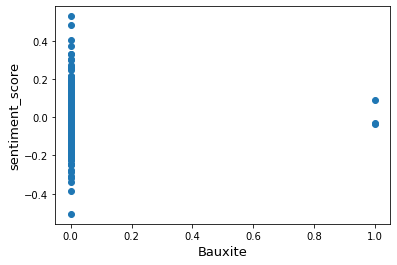

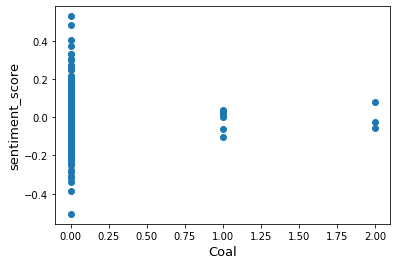

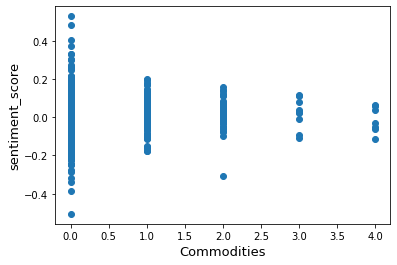

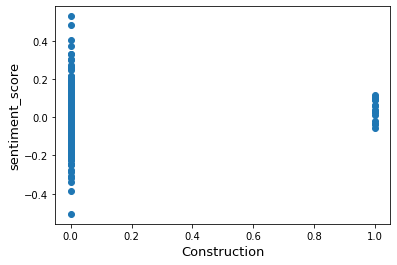

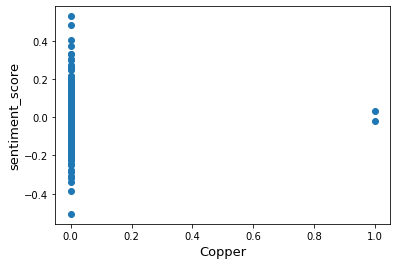

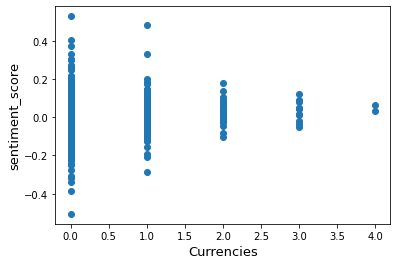

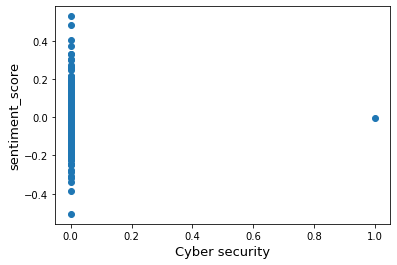

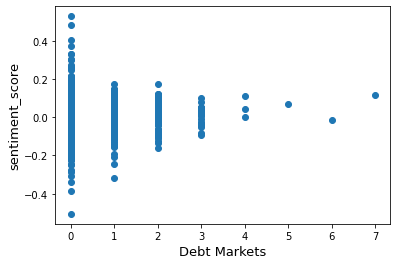

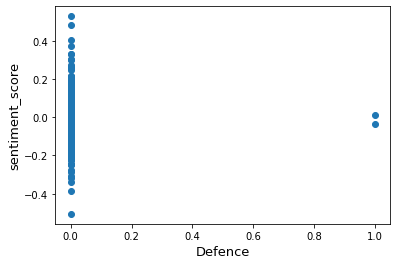

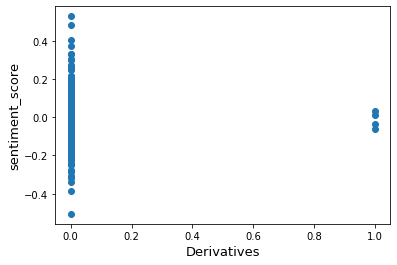

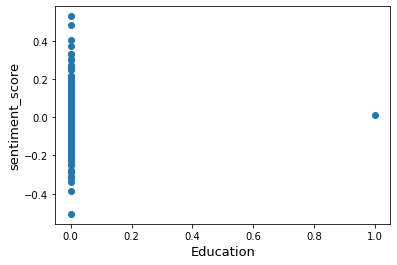

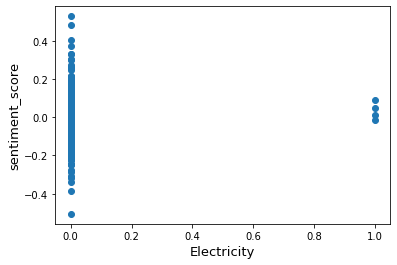

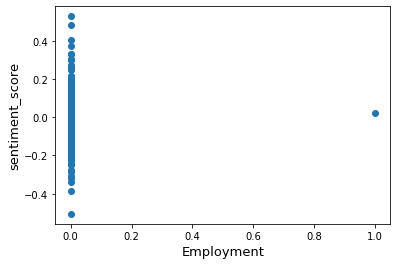

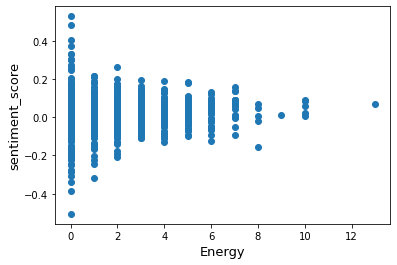

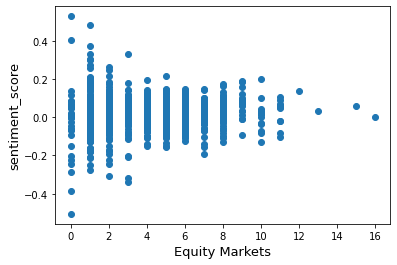

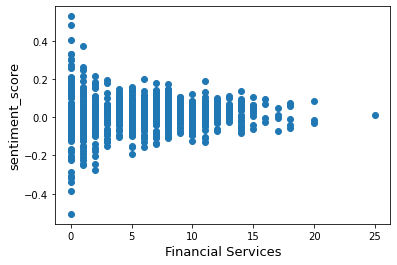

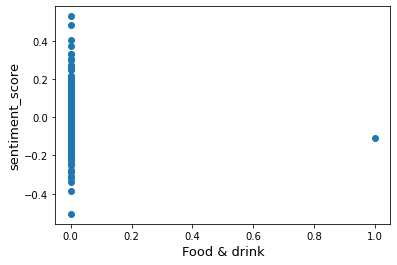

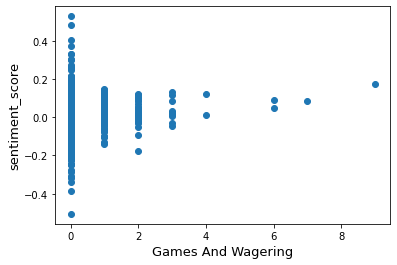

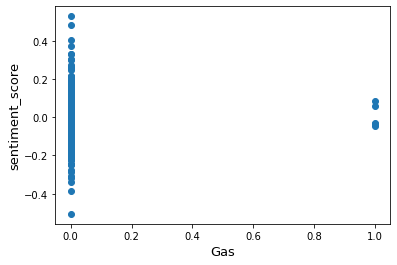

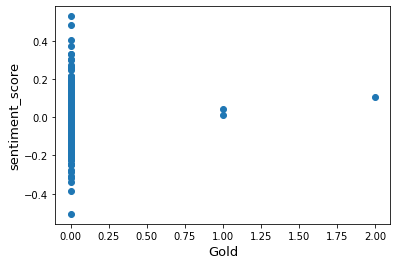

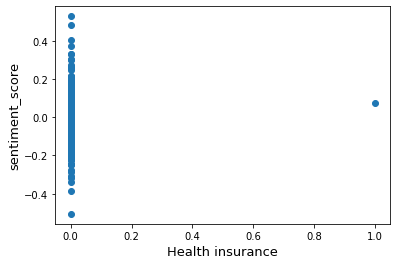

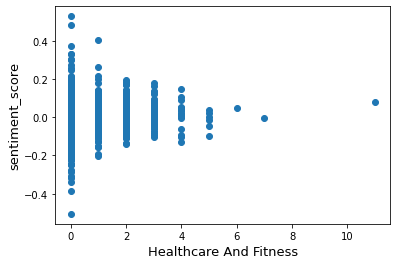

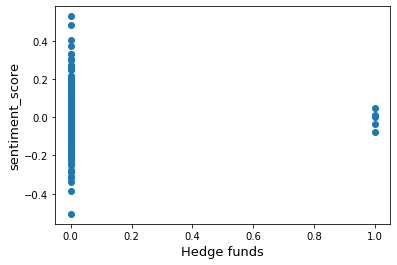

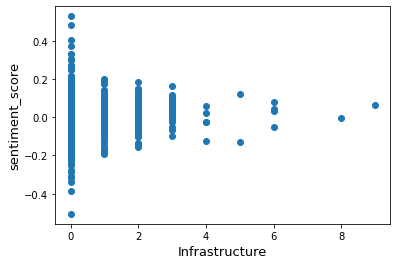

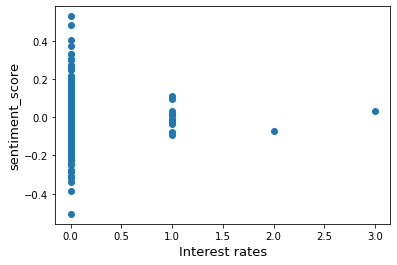

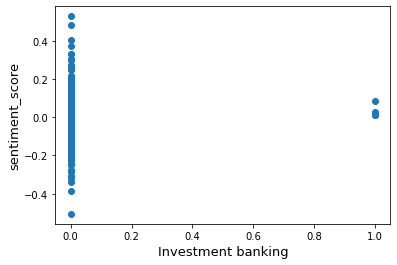

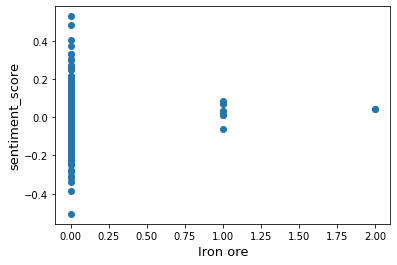

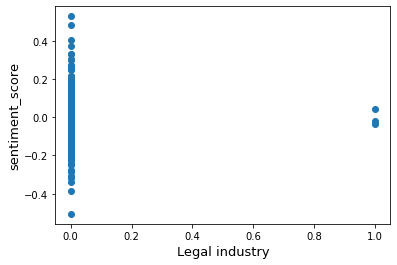

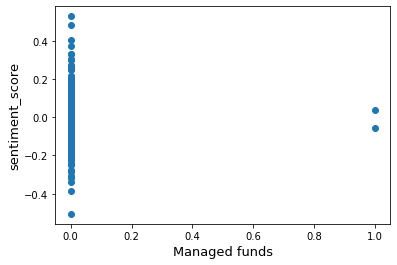

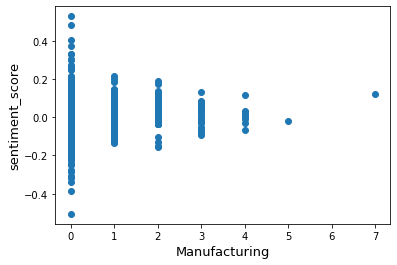

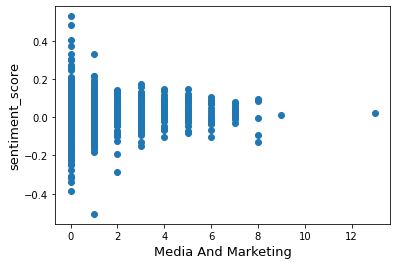

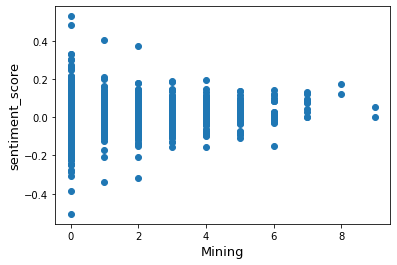

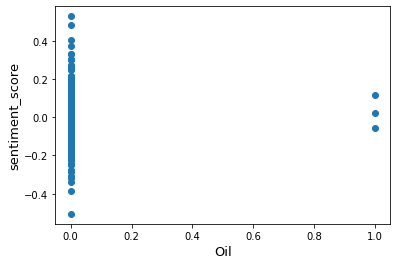

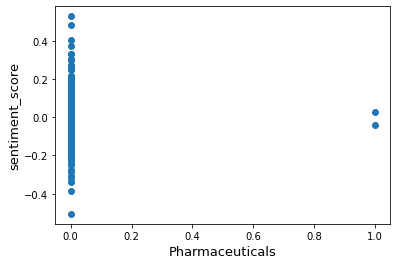

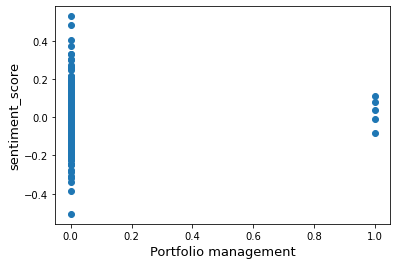

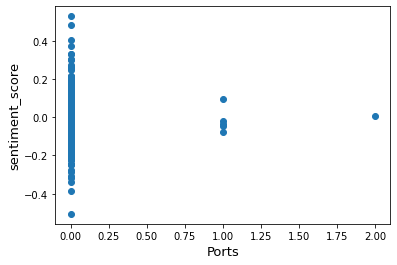

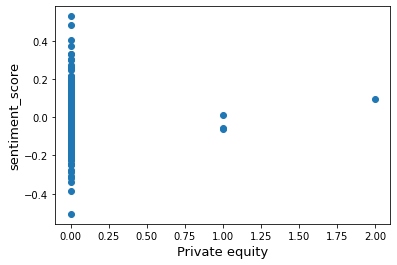

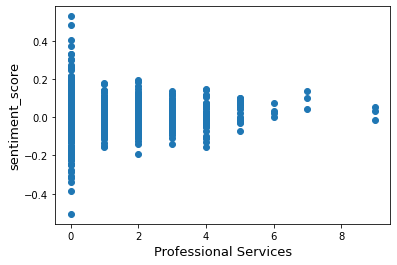

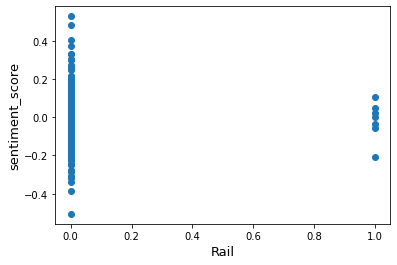

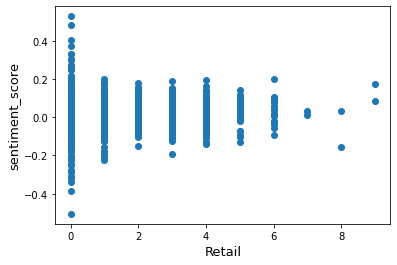

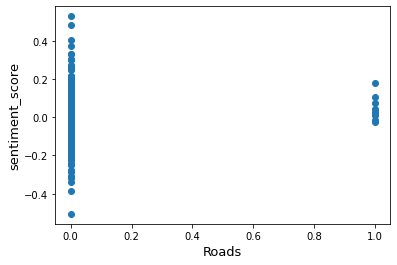

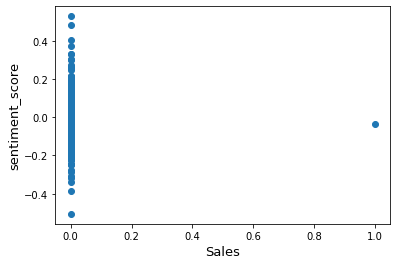

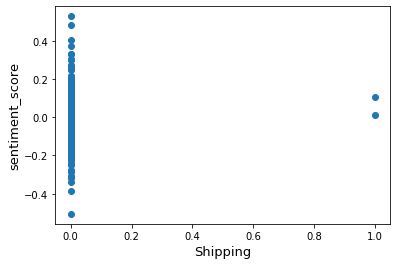

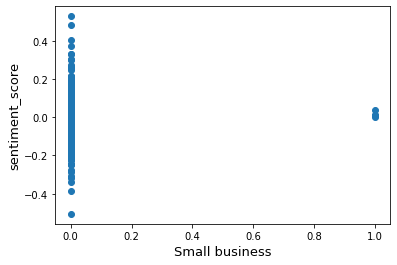

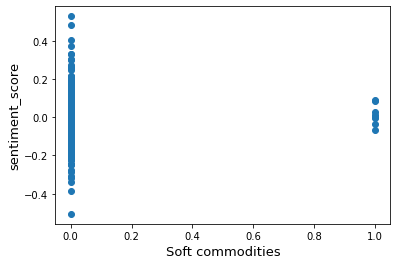

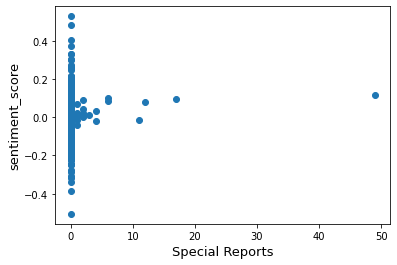

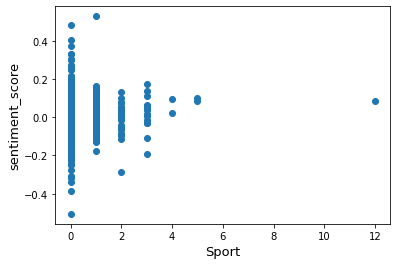

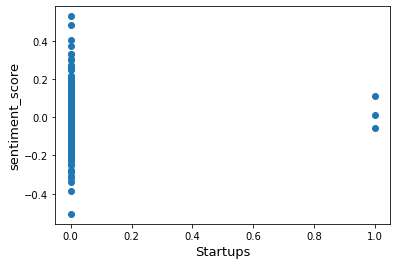

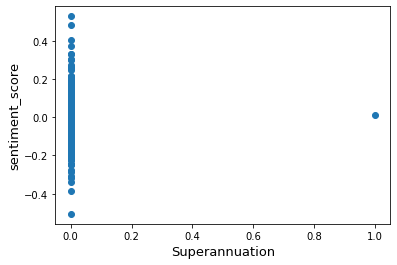

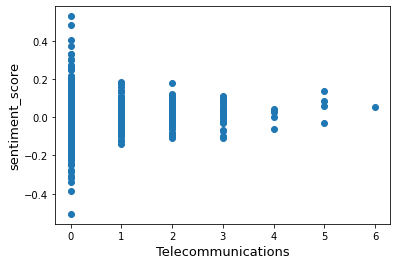

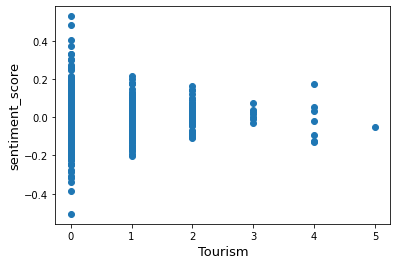

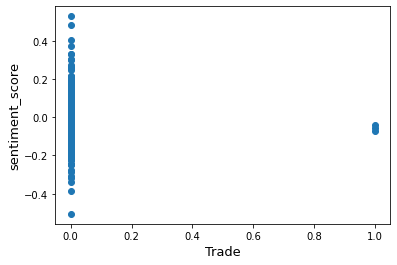

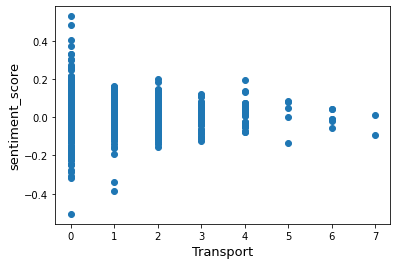

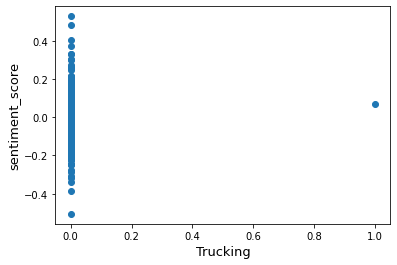

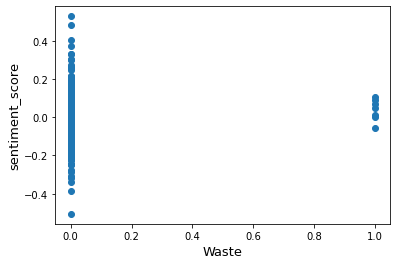

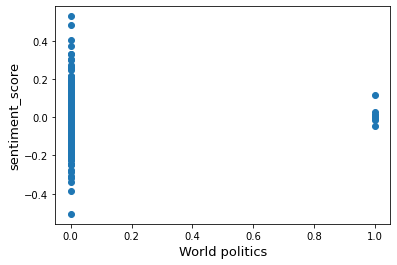

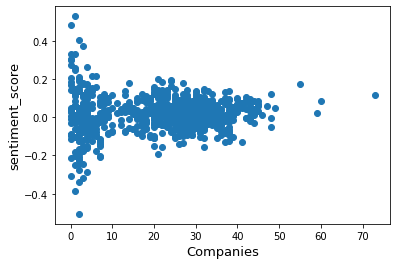

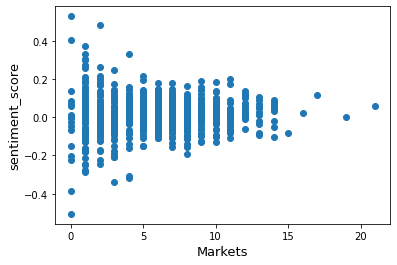

In [55]:
explore_variables('sentiment_score', merge)

In [ ]:
#Exploring correlations

In [56]:
quantitative = [f for f in merge.columns if merge.dtypes[f] != 'object']
quantitative.remove('sentiment_score')
qualitative = [f for f in merge.columns if merge.dtypes[f] == 'object']

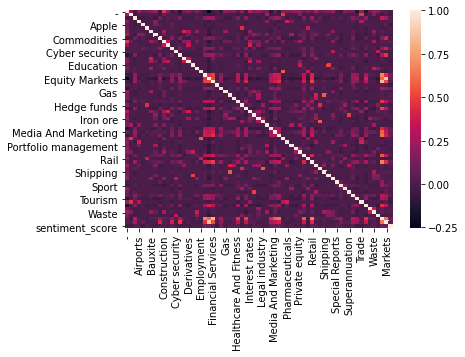

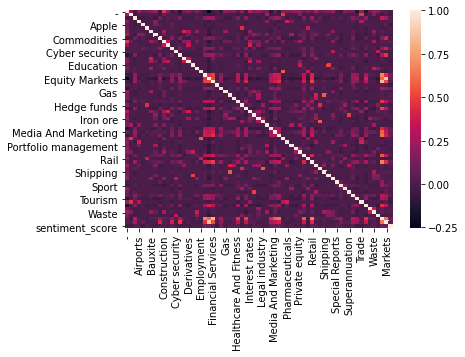

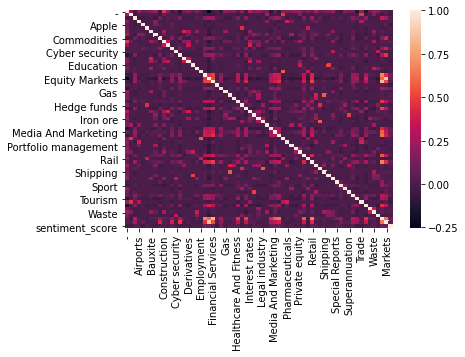

In [57]:
pyplot.figure(1)
corr = merge[quantitative+['sentiment_score']].corr()
sns.heatmap(corr)
pyplot.figure(2)
corr = merge[quantitative+['sentiment_score']].corr()
sns.heatmap(corr)
pyplot.figure(3)
#corr = merge.DataFrame(np.zeros([len(quantitative)+1, len(quantitative)+1]), index=quantitative+['sentiment_score'], columns=quantitative+['sentiment_score'])
for q1 in quantitative+['sentiment_score']:
    for q2 in quantitative+['sentiment_score']:
        corr.loc[q1, q2] = merge[q1].corr(merge[q2])
sns.heatmap(corr)


In [ ]:
#Exploring lag plots

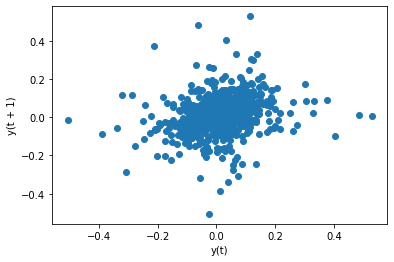

In [193]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(sentiment_by_day)
pyplot.show()

In [ ]:
#Find out stationary and non-stationarity fundaments

In [194]:
from pandas import read_csv
X = sentiment_by_day.values
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=0.010442, mean2=0.021401
variance1=0.006824, variance2=0.010574


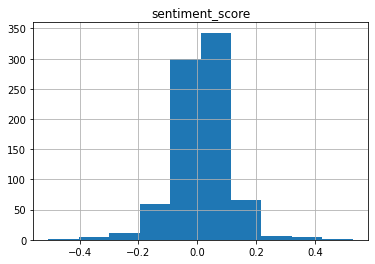

In [195]:
from matplotlib import pyplot
sentiment_by_day.hist()
pyplot.show()

In [196]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot

dataframe = concat([sentiment_by_day.shift(2), sentiment_by_day], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.206404
t+1  0.206404  1.000000


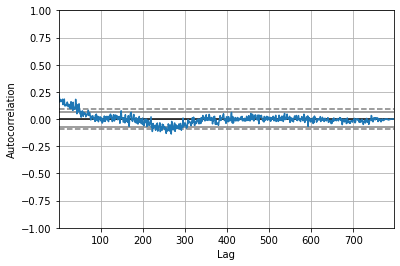

In [197]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sentiment_by_day)
pyplot.show()

In [ ]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
X = sentiment_by_day.values
X = X.astype('float32')
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test)
pyplot.plot(history, color='red')
pyplot.show()

In [ ]:
#Baseline model by assuming prediction as the last observation

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
#values = DataFrame(series.values)
dataframe = concat([sentiment_by_day.shift(1), sentiment_by_day], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test MSE: %.3f' % test_score)
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#Exploring autoregressive model

In [198]:
merge.reset_index(drop=True, inplace=True)
merge

,sentiment_score,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,Construction,Copper,Currencies,Cyber security,Debt Markets,Defence,Derivatives,Education,Electricity,Employment,Energy,Equity Markets,Financial Services,Food & drink,Games And Wagering,Gas,Gold,Health insurance,Healthcare And Fitness,Hedge funds,Infrastructure,Interest rates,Investment banking,Iron ore,Legal industry,Managed funds,Manufacturing,Media And Marketing,Mining,Oil,Pharmaceuticals,Portfolio management,Ports,Private equity,Professional Services,Rail,Retail,Roads,Sales,Shipping,Small business,Soft commodities,Special Reports,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics,Companies,Markets
0,0.049667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,0.013714,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0,0,0,0,0,2,0,1,0,0,1,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4
2,-0.005323,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,27,4
3,-0.035000,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,26,4
4,-0.000556,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,5,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.174121,0,0,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,8,8,0,9,0,0,0,2,0,1,0,0,0,0,0,2,3,8,0,0,0,0,0,1,0,9,0,0,0,0,0,0,3,0,0,1,4,0,0,0,0,0,55,11
792,0.020328,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,10,3,8,0,3,0,0,0,5,0,2,0,0,0,0,0,3,13,4,0,0,0,0,0,6,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,59,5
793,0.142808,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,4
794,0.200500,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [ ]:
# Autoregressive model - walk forward over time steps in hold out test set

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
 
series = sentiment_by_day
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
# train autoregression
window = 6
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# Autoregressive model - using almost the entire dataset to train, hold out only 6 observations

In [ ]:
# create and evaluate a static autoregressive model
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = series.values
daysrob=6
train, test = X[1:len(X)-daysrob], X[len(X)-daysrob:]
# train autoregression
model = AutoReg(train, lags=6)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#Arima model - walking forward validation by holding out 33% of the samples and saving every observation to the history and using it to predict

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
X = sentiment_by_day.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(6,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#Arima predicting by using the coefficients with a hold out of only 6 samples

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat


X = sentiment_by_day.values
size = len(X) - 6
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    ar_coef = model_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
#Preprocessing to experiment with linear and regularized models as well as a simple LSTM approach

In [199]:
Y = merge['sentiment_score']
merge.drop('sentiment_score', axis = 1, inplace = True)
merge

,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,Construction,Copper,Currencies,Cyber security,Debt Markets,Defence,Derivatives,Education,Electricity,Employment,Energy,Equity Markets,Financial Services,Food & drink,Games And Wagering,Gas,Gold,Health insurance,Healthcare And Fitness,Hedge funds,Infrastructure,Interest rates,Investment banking,Iron ore,Legal industry,Managed funds,Manufacturing,Media And Marketing,Mining,Oil,Pharmaceuticals,Portfolio management,Ports,Private equity,Professional Services,Rail,Retail,Roads,Sales,Shipping,Small business,Soft commodities,Special Reports,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics,Companies,Markets
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0,0,0,0,0,2,0,1,0,0,1,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4
2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,27,4
3,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,26,4
4,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,5,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0,0,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,8,8,0,9,0,0,0,2,0,1,0,0,0,0,0,2,3,8,0,0,0,0,0,1,0,9,0,0,0,0,0,0,3,0,0,1,4,0,0,0,0,0,55,11
792,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,10,3,8,0,3,0,0,0,5,0,2,0,0,0,0,0,3,13,4,0,0,0,0,0,6,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,59,5
793,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,4
794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [200]:
Y

0      0.049667
1      0.013714
2     -0.005323
3     -0.035000
4     -0.000556
         ...   
791    0.174121
792    0.020328
793    0.142808
794    0.200500
795   -0.047000
Name: sentiment_score, Length: 796, dtype: float64

In [201]:
X= merge
X

,-,Accounting,Agriculture,Airports,Apple,Appliances,Bauxite,Coal,Commodities,Construction,Copper,Currencies,Cyber security,Debt Markets,Defence,Derivatives,Education,Electricity,Employment,Energy,Equity Markets,Financial Services,Food & drink,Games And Wagering,Gas,Gold,Health insurance,Healthcare And Fitness,Hedge funds,Infrastructure,Interest rates,Investment banking,Iron ore,Legal industry,Managed funds,Manufacturing,Media And Marketing,Mining,Oil,Pharmaceuticals,Portfolio management,Ports,Private equity,Professional Services,Rail,Retail,Roads,Sales,Shipping,Small business,Soft commodities,Special Reports,Sport,Startups,Superannuation,Telecommunications,Tourism,Trade,Transport,Trucking,Waste,World politics,Companies,Markets
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0,0,0,0,0,2,0,1,0,0,1,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17,4
2,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,4,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,4,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,27,4
3,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,0,0,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,3,0,2,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,26,4
4,4,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,5,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,1,0,3,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0,0,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2,8,8,0,9,0,0,0,2,0,1,0,0,0,0,0,2,3,8,0,0,0,0,0,1,0,9,0,0,0,0,0,0,3,0,0,1,4,0,0,0,0,0,55,11
792,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,10,3,8,0,3,0,0,0,5,0,2,0,0,0,0,0,3,13,4,0,0,0,0,0,6,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,59,5
793,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,4
794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [202]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# build the scaler model
scaler = MinMaxScaler()
# fit using the train set
scaler.fit(X)
X_scaled = scaler.transform(X)
# Verify minimum value of all features
X_scaled.min(axis=0)
# array([0., 0., 0., 0.])
# Verify maximum value of all features
X_scaled.max(axis=0)
# array([1., 1., 1., 1.])
# Manually normalise without using scikit-learn
X_manual_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Verify manually VS scikit-learn estimation
print(np.allclose(X_scaled, X_manual_scaled))
#True

True


In [203]:
X_scaled.max()

1.0

In [204]:
X_scaled.min()

0.0

In [205]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.02739726,
        0.04761905],
       [0.5       , 0.        , 0.25      , ..., 1.        , 0.23287671,
        0.19047619],
       [0.25      , 0.        , 0.25      , ..., 1.        , 0.36986301,
        0.19047619],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.30136986,
        0.19047619],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02739726,
        0.0952381 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06849315,
        0.        ]])

In [ ]:
#Splitting the dataset, 30% as hold out samples

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.33, random_state=9)

In [207]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.47945205,
        0.28571429],
       [0.        , 0.        , 0.        , ..., 0.        , 0.02739726,
        0.04761905],
       [0.        , 0.        , 0.        , ..., 0.        , 0.31506849,
        0.57142857],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.2739726 ,
        0.23809524],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.39726027,
        0.19047619],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12328767,
        0.23809524]])

In [208]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.36986301,
        0.61904762],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.35616438,
        0.23809524],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.42465753,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.1369863 ,
        0.14285714],
       [0.        , 0.        , 0.        , ..., 0.        , 0.45205479,
        0.38095238],
       [0.25      , 0.        , 0.        , ..., 0.        , 0.39726027,
        0.28571429]])

In [209]:
y_train.values

array([-5.43414634e-02, -5.66666667e-02,  2.00000000e-04, -2.23783784e-02,
       -1.94000000e-01,  1.09642857e-02, -7.06764706e-02, -7.46666667e-03,
        3.05818182e-02, -2.08823529e-02,  2.79142857e-02, -3.88000000e-01,
        8.54411765e-02,  4.65892857e-02, -2.50000000e-02,  8.88750000e-02,
        8.93260870e-02, -1.58863636e-02, -5.09090909e-03,  4.42800000e-02,
       -1.75714286e-01,  6.10000000e-02, -8.00000000e-03,  1.32481481e-01,
        1.03333333e-01,  1.03875000e-01,  7.77234043e-02, -1.32380952e-02,
        6.37500000e-02, -1.00000000e-01,  9.09090909e-04, -3.44210526e-02,
        2.23448276e-02,  1.01219512e-02,  3.46551724e-02,  4.32619048e-02,
        5.29000000e-01,  9.72222222e-03,  8.73953488e-02, -9.14186047e-02,
       -1.04615385e-02,  6.45000000e-02,  6.25000000e-03,  2.24666667e-02,
        1.11212121e-01, -1.65200000e-02,  3.49166667e-02,  4.25510204e-02,
        7.22340426e-02, -3.90000000e-02,  3.30000000e-02, -1.84146341e-02,
        4.11538462e-02, -

In [210]:
type(y_train.values)

numpy.ndarray

In [211]:
y_test

466    0.056225
630    0.054613
561    0.033053
408    0.014794
288    0.014424
         ...   
454   -0.008000
690    0.071214
772    0.117462
265    0.072366
51     0.010457
Name: sentiment_score, Length: 263, dtype: float64

In [ ]:
#Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lin_reg_mod = LinearRegression()

In [82]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [83]:
pred = lin_reg_mod.predict(X_test)

In [84]:
pred

array([-2.38778264e-02,  1.15454524e-02,  8.79887038e-03,  2.82385676e-02,
        6.54056960e-03, -6.96345872e-03,  3.20074885e-02,  2.69873469e-02,
        4.60760921e-02,  9.19369154e-03,  1.02179378e-02,  4.41382258e-02,
        1.97089046e-02,  1.50416225e-02, -4.83820831e+09,  3.68292659e-02,
        4.13349562e-03,  1.57187312e-02, -1.51726872e-02,  8.13606673e-03,
        1.79541438e-02, -6.84411199e-02,  5.47626906e-03,  1.08864635e-02,
       -5.89534349e-03,  3.29807692e-03,  3.17328303e-02, -7.89424486e-03,
        9.60758620e-03, -3.71661850e-04,  1.28119319e-02,  5.34466200e-03,
        2.36729079e-03,  4.48730879e-03,  1.93426936e-02,  1.13165706e-02,
        4.79376643e-02,  1.30560725e-02,  6.35746413e-03,  4.86591750e-03,
        2.70941585e-02, -2.62996263e-03,  4.81632643e-03,  2.61175960e-02,
        1.62318080e-02,  1.07062190e-02,  4.13306087e-02,  7.74506026e-03,
        2.53012507e-02,  1.64664119e-02, -2.88554735e-03,  6.18536799e-02,
        1.58331721e-02,  

In [86]:
from sklearn.metrics import mean_squared_error
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

In [87]:
print(test_set_rmse)

895010115.047837


In [88]:
from sklearn.metrics import r2_score

In [89]:
test_set_r2 = r2_score(y_test, pred)

In [90]:
print(test_set_r2)

-9.93571309511601e+19


In [ ]:
#Ridge Regression

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001]},
             scoring='neg_mean_squared_error')

In [92]:
ridge_regressor.best_params_

{'alpha': 0.0001}

In [93]:
ridge_regressor.best_score_

-0.009915539858724976

In [94]:
rr = Ridge(alpha=0.0001)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.09243166615196718
0.056576669342889185
0.09409438114145607
-0.09817242807560378


In [ ]:
#Lasso Regression

In [95]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001]},
             scoring='neg_mean_squared_error')

In [96]:
lasso_regressor.best_params_

{'alpha': 0.0001}

In [97]:
lasso_regressor.best_score_

-0.009203982086309384

In [98]:
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.09290707255393293
0.04684704040398113
0.08787387992747708
0.04222662516205933


In [ ]:
#Decision Tree Regression

In [99]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
DecisionTreeRegModel = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
DecisionTreeRegModel.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [100]:
y_pred = DecisionTreeRegModel.predict(X_test)
y_pred

array([-3.98055556e-02, -2.83333333e-02, -1.56125000e-01,  2.79142857e-02,
        8.72250000e-02,  1.38378378e-02,  1.19968750e-01,  1.47941176e-02,
        4.23421053e-02,  6.25000000e-03,  1.06416667e-01, -2.90909091e-03,
       -7.06764706e-02, -1.48000000e-01, -8.16875000e-02,  9.94827586e-02,
        6.10000000e-02,  2.86956522e-03,  2.13939394e-02, -1.48000000e-01,
       -9.88000000e-03, -4.80454545e-02,  2.12500000e-02, -7.10000000e-02,
       -7.06764706e-02, -1.94000000e-01, -6.59714286e-02, -1.54931034e-01,
        2.00000000e-04,  2.12500000e-02, -1.40454545e-02, -2.88400000e-01,
        1.72600000e-01, -1.28750000e-01, -6.05128205e-03, -8.16842105e-02,
       -2.78571429e-02,  2.00937500e-02, -6.53333333e-02, -1.28750000e-01,
        4.76896552e-02,  8.55769231e-03,  3.14375000e-02,  1.48000000e-01,
        6.25000000e-03,  4.73414634e-02,  2.24666667e-02,  1.41000000e-01,
       -3.30000000e-02, -6.27142857e-02,  5.78800000e-02, -8.78048780e-04,
        3.76944444e-02,  

In [101]:
r2_score(y_test, y_pred)

-0.7273032167451849

In [102]:
mse = mean_squared_error(y_test, y_pred)
mse

0.013925969083095156

In [103]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.11800834327747829

In [ ]:
#Feature importance about the dataframe which aggroup daily aberage sentiment

[0.         0.         0.04084533 0.         0.         0.
 0.         0.         0.07024143 0.         0.         0.07464524
 0.         0.0615125  0.         0.         0.         0.
 0.         0.05223483 0.03654514 0.06365704 0.         0.
 0.         0.         0.         0.0756614  0.         0.05368826
 0.         0.         0.         0.         0.         0.05569347
 0.01141737 0.01203776 0.         0.         0.         0.
 0.         0.06866579 0.         0.06184962 0.         0.
 0.         0.         0.         0.         0.02533812 0.
 0.         0.06105798 0.09308943 0.         0.02937265 0.
 0.         0.         0.04957616 0.00287063]


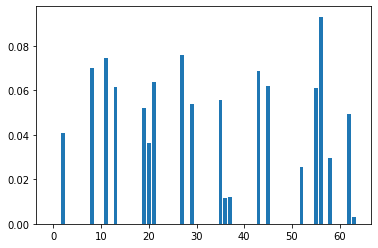

In [104]:
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
# load data
# split data into X and y
X = X
y = Y
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
#XGBRegressor

In [105]:
import xgboost as xg 
# Instantiation 
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

[17:52:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.118008


In [ ]:
# A simple LSTM (without optimize hyperparameters)

In [291]:
# univariate lstm example
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X_, y_ = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X_.append(seq_x)
        y_.append(seq_y)
    return array(X_), array(y_)

In [214]:
y_train.reset_index(drop=True, inplace=True)

In [215]:
y_train

0     -0.054341
1     -0.056667
2      0.000200
3     -0.022378
4     -0.194000
         ...   
528    0.028714
529   -0.104000
530   -0.148920
531   -0.002909
532    0.100571
Name: sentiment_score, Length: 533, dtype: float64

In [297]:
n_steps = 15
raw_seq = y_train
# split into samples
X_train_, y_train_ = split_sequence(raw_seq, n_steps)
# summarize the data
#for i in range(len(X_)):
    #print(X_[i], y_[i])

In [298]:
X_train_.shape

(518, 15)

In [299]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras import activations

n_features = 1
X_train_ = X_train_.reshape((X_train_.shape[0], X_train_.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(1024, activation='linear', input_shape=(n_steps, n_features)))
model.add(Dense(1))
print(model.summary())
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train_, y_train_, epochs=20, verbose=1, validation_split=0.2)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 1024)              4202496   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 1025      
Total params: 4,203,521
Trainable params: 4,203,521
Non-trainable params: 0
_________________________________________________________________
None
Train on 414 samples, validate on 104 samples
Epoch 1/20
414/414 [==============================] - 15s 37ms/sample - loss: 0.0095 - val_loss: 0.0076
Epoch 2/20
414/414 [==============================] - 13s 31ms/sample - loss: 0.0092 - val_loss: 0.0081
Epoch 3/20
414/414 [==============================] - 14s 33ms/sample - loss: 0.0092 - val_loss: 0.0079
Epoch 4/20
414/414 [==============================] - 14s 33ms/sample - loss: 0.0092 - val_loss: 0.0078
Epoch 5/20
414/414 [==================

In [262]:
y_test.reset_index(drop=True, inplace=True)

In [300]:
y_test.shape

(263,)

In [302]:
# Testing prediction
n_steps = 15
raw_seq = y_test
# split into samples
X_testt, y_testt = split_sequence(raw_seq, n_steps)
# summarize the data
#for i in range(len(X_testt)):
    #print(X[i], y[i])
    #print(X_testt[i])
    
#x_test = X_test
n_features = 1
Xx = X_testt.reshape((X_testt.shape[0], X_testt.shape[1], n_features))
#x_testtt = X_testt.reshape((1, n_steps, n_features))
yhat = model.predict(tf.cast(Xx, tf.float32), verbose=0)
#print(yhat)

In [303]:
# RMSE Computation 
mse = mean_squared_error(y_testt, yhat)
rmse = np.sqrt(mse)

#rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.091203
